In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import sys
import json

In [21]:
def read_json(id, start_date):
  # json파일 불러오기
  with open (f"{id}_{start_date}.json", "r") as f:
      plot_data = json.load(f)

  # 기본 정보 추출
  base_info = {
      'id': int(plot_data['id']),
      'name': plot_data['name'],
      'gender': int(plot_data['gender']),
      'age': int(plot_data['age'])
  }

  # 날짜별 점수 추출
  score_dict = {entry['date']: entry['score'] for entry in plot_data['score_changes']}

  # 병합
  full_row = {**base_info, **score_dict}

  # 데이터프레임 생성
  plot_df = pd.DataFrame([full_row])

  return plot_df

In [22]:
def draw_graph(id, start_date):

  df = read_json(id, start_date)
  gender = df['gender'][0]
  age = df['age'][0]
  name = df['name'][0]

  # score로 시작하는 컬럼만 추출
  score_cols = [col for col in df.columns if col.startswith("20")]
  score_values = df[score_cols].iloc[0]  # 첫 번째 행 기준 점수들

  # 배경 색상 (구간 나누기)
  plt.axhspan(0, 50, facecolor='green', alpha=0.1, label='정상 (0~50)')
  plt.axhspan(50, 75, facecolor='yellow', alpha=0.1, label='경도 (50~75)')
  plt.axhspan(75, 100, facecolor='red', alpha=0.1, label='중증 (75~100)')

  # 그래프 그리기
  plt.ylim(0, 100)
  plt.yticks([0, 50, 75, 100], ['0', '50', '75', '100'])
  plt.xticks

  plt.plot(score_cols, score_values, marker='o')
  plt.title(f"Score Trend (gender={gender}, age={age})")
  plt.xlabel("Score Step")
  plt.ylabel("Score Value")
  plt.grid(True)
  plt.tight_layout()
  plt.show()

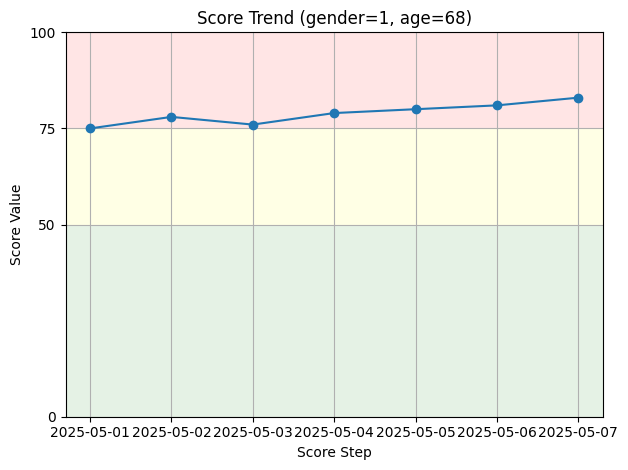

In [23]:
draw_graph('00000000', '2025-05-01')